# MPCS53110 Problem Session 4

### 1/28/2017

Today:
* Exam 1
* "HW" in assignment 3
* "DO" in assignment 4

In [17]:
## re-size the plots.
library(repr)
options(repr.plot.width=5, repr.plot.height=3)

## _Exam 1_
***

### Problem 1

* 1(a)
$$E[X]=\int_{0}^{1} x f_X(x) dx = \cdots$$

* 1(b)
$$E[X^2]=\int_{0}^{1} x^2 f_X(x) dx = \cdots \\
Var[X] = E[X^2] - (E[X])^2
$$

### Problem 2

(show some examples of traffice sequences.)

"Wait exactly 4 seconds" implies:
* <span style="color:blue"> There is at least one car passing during the first three seconds. </span>
* <span style="color:green"> There is a car passing during the fourth second. </span>
* <span style="color:darkred">There is no car passing during the fifth, sixth and seventh second. </span>

**Answer=<span style="color:blue">$\left[1 - (1-p)^3 \right]$
</span><span style="color:green">$p$</span>
<span style="color:darkred">$(1-p)^3$</span>.**

### Problem 3

Assumptions:
 1. 
 $X=\begin{cases}
 1, & \text{take vitamin C supplements} \\
 0, & \text{does not take}
 \end{cases}
 $,  $P(X=1)=0.7$.
 
 2. $Y$, number of colds.
 $$
 \begin{align}
 Y | X=1 & \sim \text{Pois}(3) \\
 Y | X=0 & \sim \text{Pois}(5) \\
 \end{align}
 $$

* 3(a) $P(Y \leq 2 | X=1)$=```ppois(2,3)```, $P(Y \leq 2 | X=0)$= ```ppois(2,5)```

* 3(b) Use law of total probability and conditional probability.  
$$
\begin{align}
P(Y \leq 2)&=P(Y \leq 2, X=1)+P(Y \leq 2, X=0) \\
&=P(Y \leq 2 | X=1)P(X=1)+P(Y\leq 2| X=0)P(X=0) \\
&= \cdots
\end{align}
$$

* 3(c) Use Baye's rule.  $$P(X=1 | Y \leq 2)=\frac{P(Y \leq 2 | X=1)P(X=1)}{P(Y \leq 2)}$$

### Problem 4
Let $X_1$ and $X_2$ be the demands in the first and second week. $X_1, X_2 \sim \mathcal{N}(1000, 200^2)$.
* 4(a) Probability that each of the 2 weeks has demand less than 1100:

$$P(X_1 < 1100 , \, X_2 < 1100)=P(X_1 < 1100)P(X_2 < 1100)$$
and
$P(X_1<1100)=P(X_2<1100)$=```pnorm(1100, mean = 1000, sd = 200)```.

* 4(b) Probability that total of the demands exceeds 2200:
$$P(X_1 + X_2 > 2200)$$
**This is different from $P(2X_1 > 2200)$.**
We know that the linear combination of Gaussian random variables is still a Gaussian random variable. 
Assume that 
$$X_1 + X_2 \sim \mathcal{N}(\mu, \sigma^2)$$
with some unknown $\mu$, $\sigma$. We can find out the value of $\mu$ and $\sigma$ by:
  * using the linearity of expectation: $\mu = E(X_1 + X_2)=E(X_1)+E(X_2)=1100+1100=2200$.
  * using the fact that $X_1$ and $X_2$ are independent: $\sigma^2 = Var(X_1+X_2)=Var(X_1)+Var(X_2)=200^2+200^2=2\cdot 200^2$.

Therefore, $P(X_1 + X_2 > 2200)=1-P(X_1 + X_2 \leq 2200)$=```1-pnorm(2200, mean = 2200, sd = sqrt(2*200^2))```.

* Extra: what is the distribution of $X_1 - X_2$ ?

### Problem 5

Similar problems: p163 example 4.2-3,   p191 excercise 4.4-8

$f(x,y)=kxy^2$, for $0\leq x \leq 2$, $x\leq y \leq 3$.

* 5(a) Find the constant $k$.
Set $$\int_{0}^{2} \left( \int_{x}^{3} kxy^2 \, dy \right) dx =1. $$

* 5(b) Find the joint CDF of $X$ and $Y$. 
For $0\leq x \leq 2, \, x\leq y \leq 3$:
$$
\begin{aligned} F_{X,Y}(s,t) &=P(X \leq s , \, Y \leq t) \\
&=\int_{0}^{s} \left( \int_{x}^{t} kxy^2 \,dy \right) \, dx 
\end{aligned}
$$

### Problem 6

Use the command ```runif(1, min = a, max=b)``` to draw a number from [a,b] uniformly.

In [1]:
my_sampler <- function(fx, M, a, b){

    repeat {
        x <- runif(1, min = a, max = b)
        y <- runif(1, min = 0, max = M)
        if (fx(x) >= y)
            break
        }
    x
    }

In [2]:
1 < 2 & 3 < 4

[1] TRUE

Examples:

* Define the pdf of a truncated Gaussian distribution:
$$
f_X(x)=\begin{cases}
\frac{1}{Z}\psi(x ; \mu=1, \sigma=1), & x \in [a,b] \\
0, & \text{otherwise}.
\end{cases}
$$
where $\psi(x ; \mu=1, \sigma=1)$ is the pdf of a Gaussian distribution with mean 1 and standard deviation 1; $Z$ is a normalizing constant that makes the integral of $f_X(x)$ over $[a,b]$ be equal to one.

In [3]:
## define the pdf of a truncated Gaussian
truncated_gaussian <- function(x) {
    
    # set the range
    a <- -1
    b <- 2
    
    # set the mean and sd of Gaussian
    mean <- 1
    sd <- 1
    
    # find the normalizing constant
    Z <- pnorm(b, mean = mean, sd = sd)-pnorm(a, mean = mean, sd = sd) 
    
    ret <- (dnorm(x, mean = mean, sd = sd) / Z)*(x >= a & x <=b)
    ret
    }

Now, use the function my_sampler to draw a sample (of size 10000) from the truncated Gaussian distribution.  

In [4]:
samples <- replicate(10000, my_sampler( truncated_gaussian, 1, -1, 2))


**Note**: The maximum of this pdf is $\frac{1}{Z}\psi(1) \approx 0.487$.  But $M$ is set to 1 in this example.  In fact, as long as $M$ is greater than or equal to the maximum of the pdf, the algorithm will work.  However, the larger $M$ is, the smaller the rate of success is.

Plot the empirical distribution against the pdf:

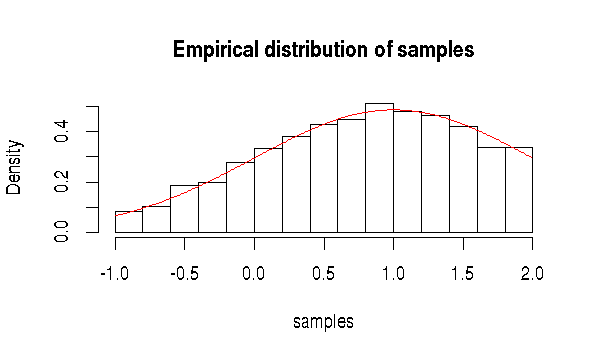

In [16]:
xs <- seq(-1, 2, 0.01)
ys <- truncated_gaussian(xs)
hist(samples, probability = T, main = "Empirical distribution of samples")
lines(xs, ys, col = "red")

Another example, sampling Beta distribution (https://en.wikipedia.org/wiki/Beta_distribution):

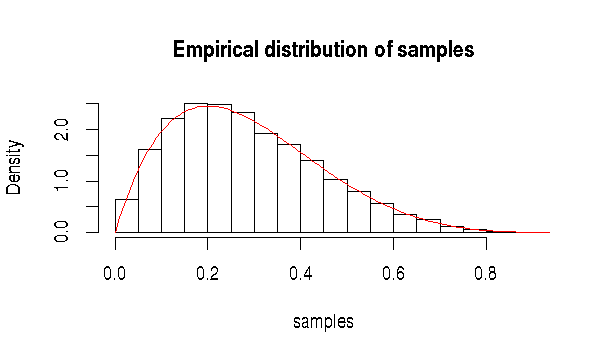

In [20]:
my_beta <- function (x) { dbeta(x, 2, 5) }
samples <- replicate(10000, my_sampler( my_beta, 2.5, 0, 1))
xs <- seq(0, 1, 0.01)
ys <- my_beta(xs)
hist(samples, probability = T, main = "Empirical distribution of samples")
lines(xs, ys, col = "red")

* 6(b)  Let $T$ be the number of draws.  Then, $T\sim \text{Geometric(p)}$ where $p$ is the probability to obtain a success in a single draw.  Here, sucess means $f_X(x) \geq y$ which is the same as the probability that $(x,y)$ falls under the curve $f_X$.  Therefore, 

$$p=\frac{\int_a^b f_X(x) dx}{M(b-1)}=\frac{1}{M(b-1)}$$

$E [T] = \frac{1}{p} = \cdots$

Extra: what if $F_X(x)$ is non-zero for any $x$ between $-\infty$ and $\infty$?  Check out "Inverse transform sampling": https://en.wikipedia.org/wiki/Inverse_transform_sampling

## "HW" in assignment 3

### Q1
We say that $\chi_\alpha$ is the $100(1-\alpha)$ percentile of the CDF $F_X$ if $F_X(1-\chi_\alpha)=1-\alpha$.
Find $\chi_\alpha$ for the CDF having PDF $f_\chi(x)=2\exp(-2x)$ for $x\geq 0$ and 0 otherwise.


1. Find the CDF of $x$.

2. Solve $F_X(1-\chi_\alpha)=1-\alpha$ for $\chi_\alpha$.
Alternatively, solve $F_X(\chi_\alpha)= 1-\alpha$ for $\chi_\alpha$.

### Q2

Assumptions:
* Innocent: $f_{X_{\text{innocent}}}(x)=e^{-x}$
* Guilty: $f_{X_{\text{guilty}}}(x)=\frac{1}{2}e^{-x/2}$

2.1 Solve $P(X_{\text{innocent}} \leq c)=0.95$ for $c$.

2.2 Calculate $P(X_{\text{guilty}}>C)$

### Q3

$X_{\text{algorithms}} \sim \mathcal{N}(60, 20^2)$,  $X_{\text{data-analysis}} \sim \mathcal{N}(50, 10^2)$.

In [6]:
print("proportion of students got lower grades then you on algorithms:")
pnorm(70, mean = 60, sd = 20)

[1] "proportion of students got lower grades then you on algorithms:"


[1] 0.6914625

In [7]:
print("proportion of students got lower grades then you on data analysis:")
pnorm(62, mean = 50, sd = 10)

[1] "proportion of students got lower grades then you on data analysis:"


[1] 0.8849303

### Q5

* 5(a) Binomial distribution, with parameters $n$ and $p$.

In [9]:
sample_binomial<-function(n,p){
    sum(sample(0:1, size = n, replace = TRUE, prob = c(1-p, p)))    
    }

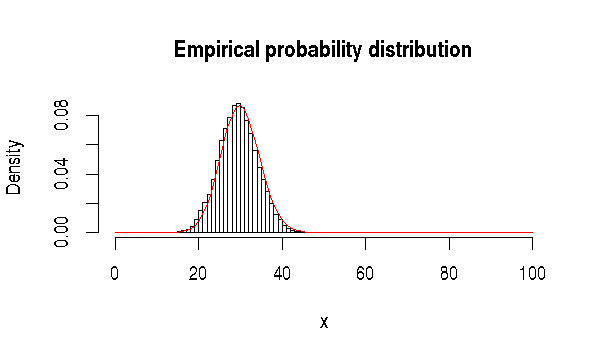

In [10]:
n<-100
p<-0.3
my_sample<-replicate(10000, sample_binomial(n,p))
hist(my_sample, breaks=0:n, prob=T, xlab = "x", main = "Empirical probability distribution")
lines(0:n, dbinom(0:n, n, p), col = "red")

* 5(b) Geometric distribution, with parameter $p$.

In [11]:
sample_geometric<-function(p){
    counter = 1
    while (sample(0:1, size = 1, prob = c(1-p, p))==0){
        counter <- counter+1
        }
    counter
    }

In [12]:
# dgeom(1,0.5) is the probability to get a "success" after one failure -- this is different from the 
# definition of geometric distribution in the book.
dgeom(1, 0.5) 

[1] 0.25

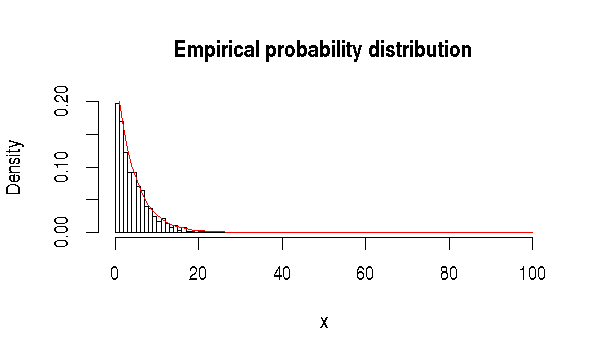

In [13]:
p <- 0.2
my_sample<-replicate(1000, sample_geometric(p))
hist(my_sample, breaks = 0:100, prob = T, xlab = "x", main = "Empirical probability distribution")
xs <- 1:100
lines(xs, dgeom(xs-1, p), col = "red") # notice the range of x.

* 5(c) Hypergeometric distribution, with parameters $M_1$, $M_2$ and $N$.

In [14]:
sample_hypergeom<-function(M1, M2, N){
    urn <- c(rep(1,M1), rep(0,M2))
    sum( sample( urn, size = N, replace = FALSE))
    }

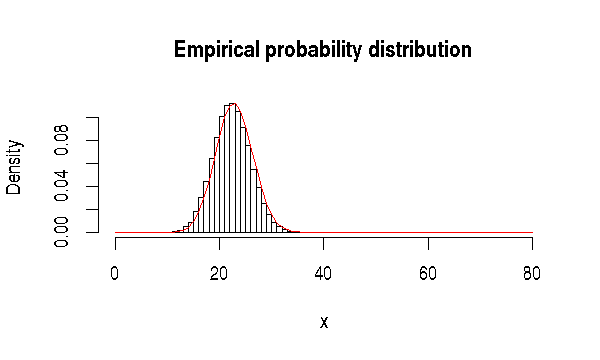

In [15]:
M1 <- 100
M2 <- 250
N <- 80
my_sample<-replicate(100000, sample_hypergeom(M1, M2, N))
hist(my_sample, breaks = 0:N, prob = T, xlab = "x", main = "Empirical probability distribution")
xs <- 0:N
lines(xs, dhyper(xs, M1, M2, N), col = "red")